In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [9]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the dataset

Saving tips.csv to tips (1).csv


In [10]:

# Load dataset
tips_data = pd.read_csv('tips.csv')
tips_data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


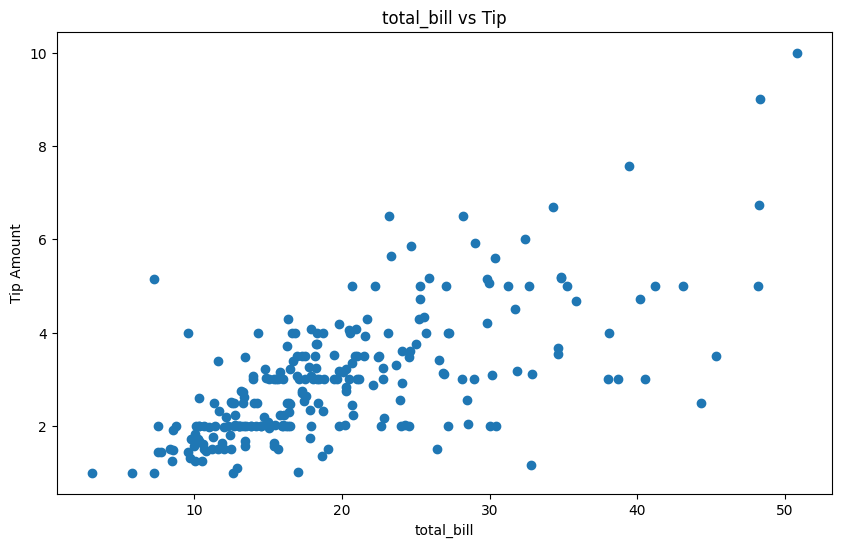

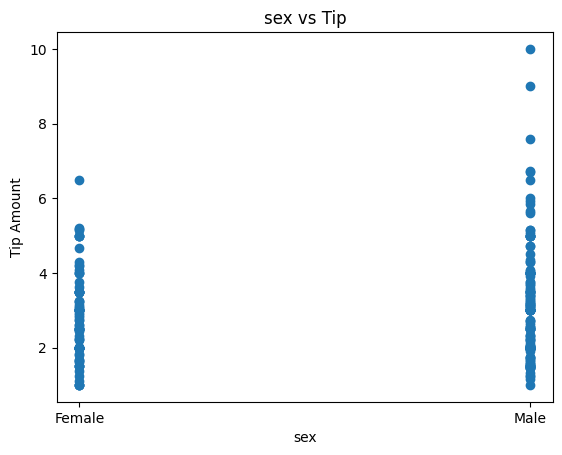

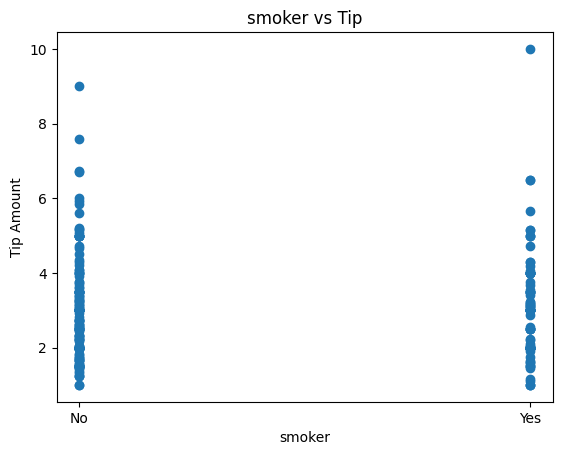

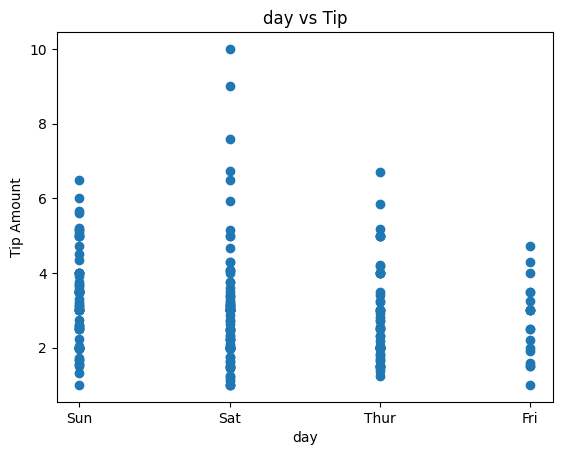

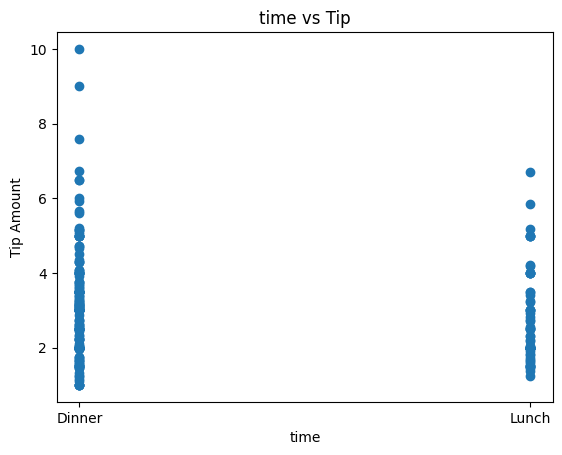

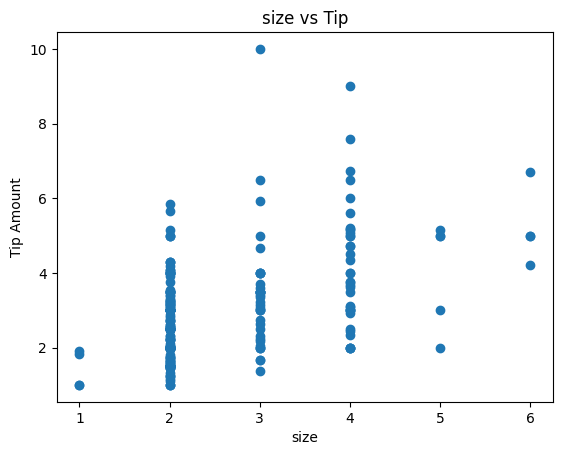

In [11]:

features = tips_data.drop(columns=['tip'])
target = tips_data['tip']

plt.figure(figsize=(10, 6))
# Generating scatter plots for each feature against the target variable
for index in range(features.shape[1]):
    plt.scatter(features.iloc[:, index], target)
    plt.xlabel(features.columns[index])
    plt.ylabel('Tip Amount')
    plt.title(f"{features.columns[index]} vs Tip")
    plt.show()


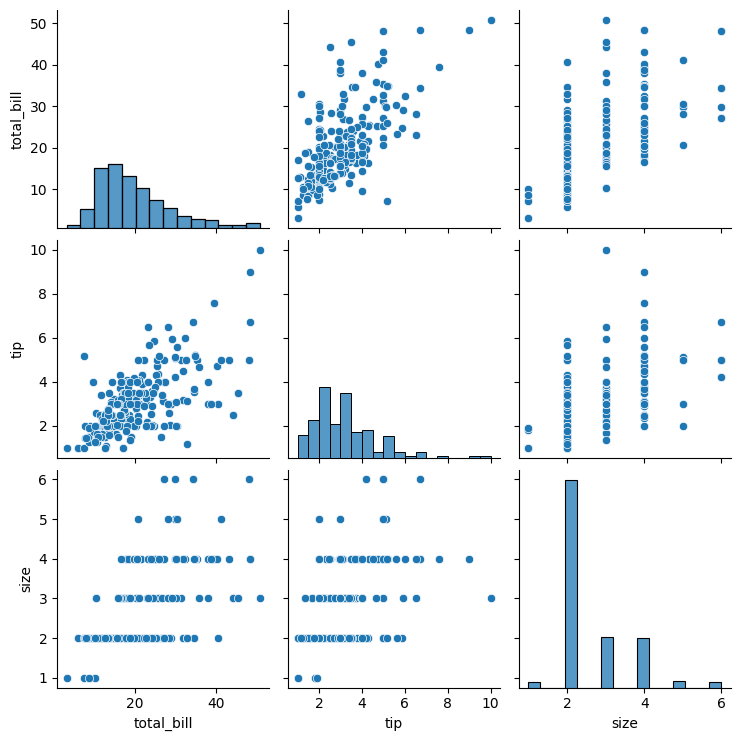

In [12]:

# Visualizing relationships between features using pairplot
sns.pairplot(tips_data)


<Axes: >

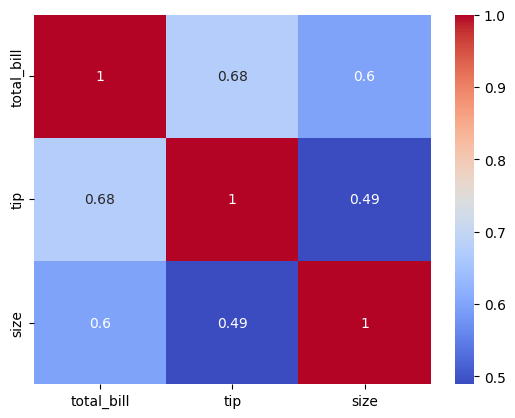

In [13]:

# Creating a subset of numerical features for correlation analysis
numerical_subset = tips_data[['total_bill', 'tip', 'size']]
correlation_matrix = numerical_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [14]:

encoder = LabelEncoder()
features['sex'] = encoder.fit_transform(tips_data['sex'])
features['smoker'] = encoder.fit_transform(tips_data['smoker'])
features['day'] = encoder.fit_transform(tips_data['day'])
features['time'] = encoder.fit_transform(tips_data['time'])


In [28]:

import statsmodels.api as sm
# Setting up the independent (X) and dependent (y) variables
X_features = sm.add_constant(features)  # Adding a constant term to the model
y_target = target

# Fitting the linear regression model using statsmodels
ols_model = sm.OLS(y_target, X_features).fit()


In [16]:

from statsmodels.stats.diagnostic import linear_rainbow

rainbow_test_stat, rainbow_p_value = linear_rainbow(ols_model)

print(f"Rainbow Test Statistic: {rainbow_test_stat}")
print(f"P-value: {rainbow_p_value}")


Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


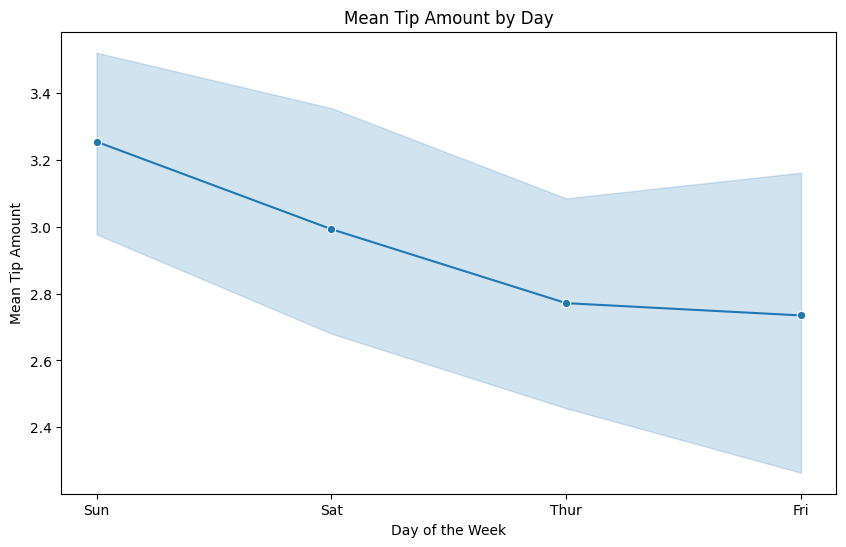

In [17]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=tips_data, x="day", y="tip", estimator="mean", marker="o")
plt.title("Mean Tip Amount by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Tip Amount")
plt.show()


In [18]:

# One-hot encoding categorical columns and splitting data into features and target
encoded_tips = pd.get_dummies(tips_data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = encoded_tips.drop(columns='tip')
y = encoded_tips['tip']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions_lr = linear_model.predict(X_test)

# Calculating and displaying evaluation metrics
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
print(f"Linear Regression -\nMSE: {mse_lr}\nR^2: {r2_lr}\nRMSE: {np.sqrt(mse_lr)}")


Linear Regression -
MSE: 0.7033566017436106
R^2: 0.43730181943482493
RMSE: 0.8386635807900631


In [20]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Computing metrics for evaluation
mse_ridge = mean_squared_error(y_test, ridge_predictions)
r2_ridge = r2_score(y_test, ridge_predictions)
print(f"Ridge Regression -\nMSE: {mse_ridge}\nR^2: {r2_ridge}\nRMSE: {np.sqrt(mse_ridge)}")


Ridge Regression -
MSE: 0.7007477213216077
R^2: 0.4393889716178484
RMSE: 0.8371067562274287


In [21]:

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Evaluating Lasso regression
mse_lasso = mean_squared_error(y_test, lasso_predictions)
r2_lasso = r2_score(y_test, lasso_predictions)
print(f"Lasso Regression -\nMSE: {mse_lasso}\nR^2: {r2_lasso}\nRMSE: {np.sqrt(mse_lasso)}")


Lasso Regression -
MSE: 0.5908528649971524
R^2: 0.5273068720881755
RMSE: 0.768669542129225


In [22]:

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Assessing the model's performance
mse_tree = mean_squared_error(y_test, tree_predictions)
r2_tree = r2_score(y_test, tree_predictions)
print(f"Decision Tree -\nMSE: {mse_tree}\nR^2: {r2_tree}\nRMSE: {np.sqrt(mse_tree)}")


Decision Tree -
MSE: 1.2551938775510205
R^2: -0.004178121600921791
RMSE: 1.120354353564541


In [23]:

forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Evaluating Random Forest model
mse_forest = mean_squared_error(y_test, forest_predictions)
r2_forest = r2_score(y_test, forest_predictions)
print(f"Random Forest -\nMSE: {mse_forest}\nR^2: {r2_forest}\nRMSE: {np.sqrt(mse_forest)}")


Random Forest -
MSE: 0.9196720148979602
R^2: 0.2642455218065466
RMSE: 0.9589953153680993


In [24]:

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Model evaluation for SVR
mse_svr = mean_squared_error(y_test, svr_predictions)
r2_svr = r2_score(y_test, svr_predictions)
print(f"SVR -\nMSE: {mse_svr}\nR^2: {r2_svr}\nRMSE: {np.sqrt(mse_svr)}")


SVR -
MSE: 0.5323763062616395
R^2: 0.5740891915042663
RMSE: 0.7296412174909251


In [25]:

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Assessing KNN regressor performance
mse_knn = mean_squared_error(y_test, knn_predictions)
r2_knn = r2_score(y_test, knn_predictions)
print(f"KNN -\nMSE: {mse_knn}\nR^2: {r2_knn}\nRMSE: {np.sqrt(mse_knn)}")


KNN -
MSE: 0.8763725714285714
R^2: 0.29888587066985495
RMSE: 0.9361477294896203


In [26]:

cross_val_scores = cross_val_score(linear_model, X, y, cv=5)
print(f"Cross-Validation Scores (Linear Regression): {cross_val_scores}")


Cross-Validation Scores (Linear Regression): [0.52819606 0.59245311 0.40773384 0.20031853 0.37876153]


In [27]:

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

print(f"Optimal Parameters: {grid_search_rf.best_params_}")


Optimal Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


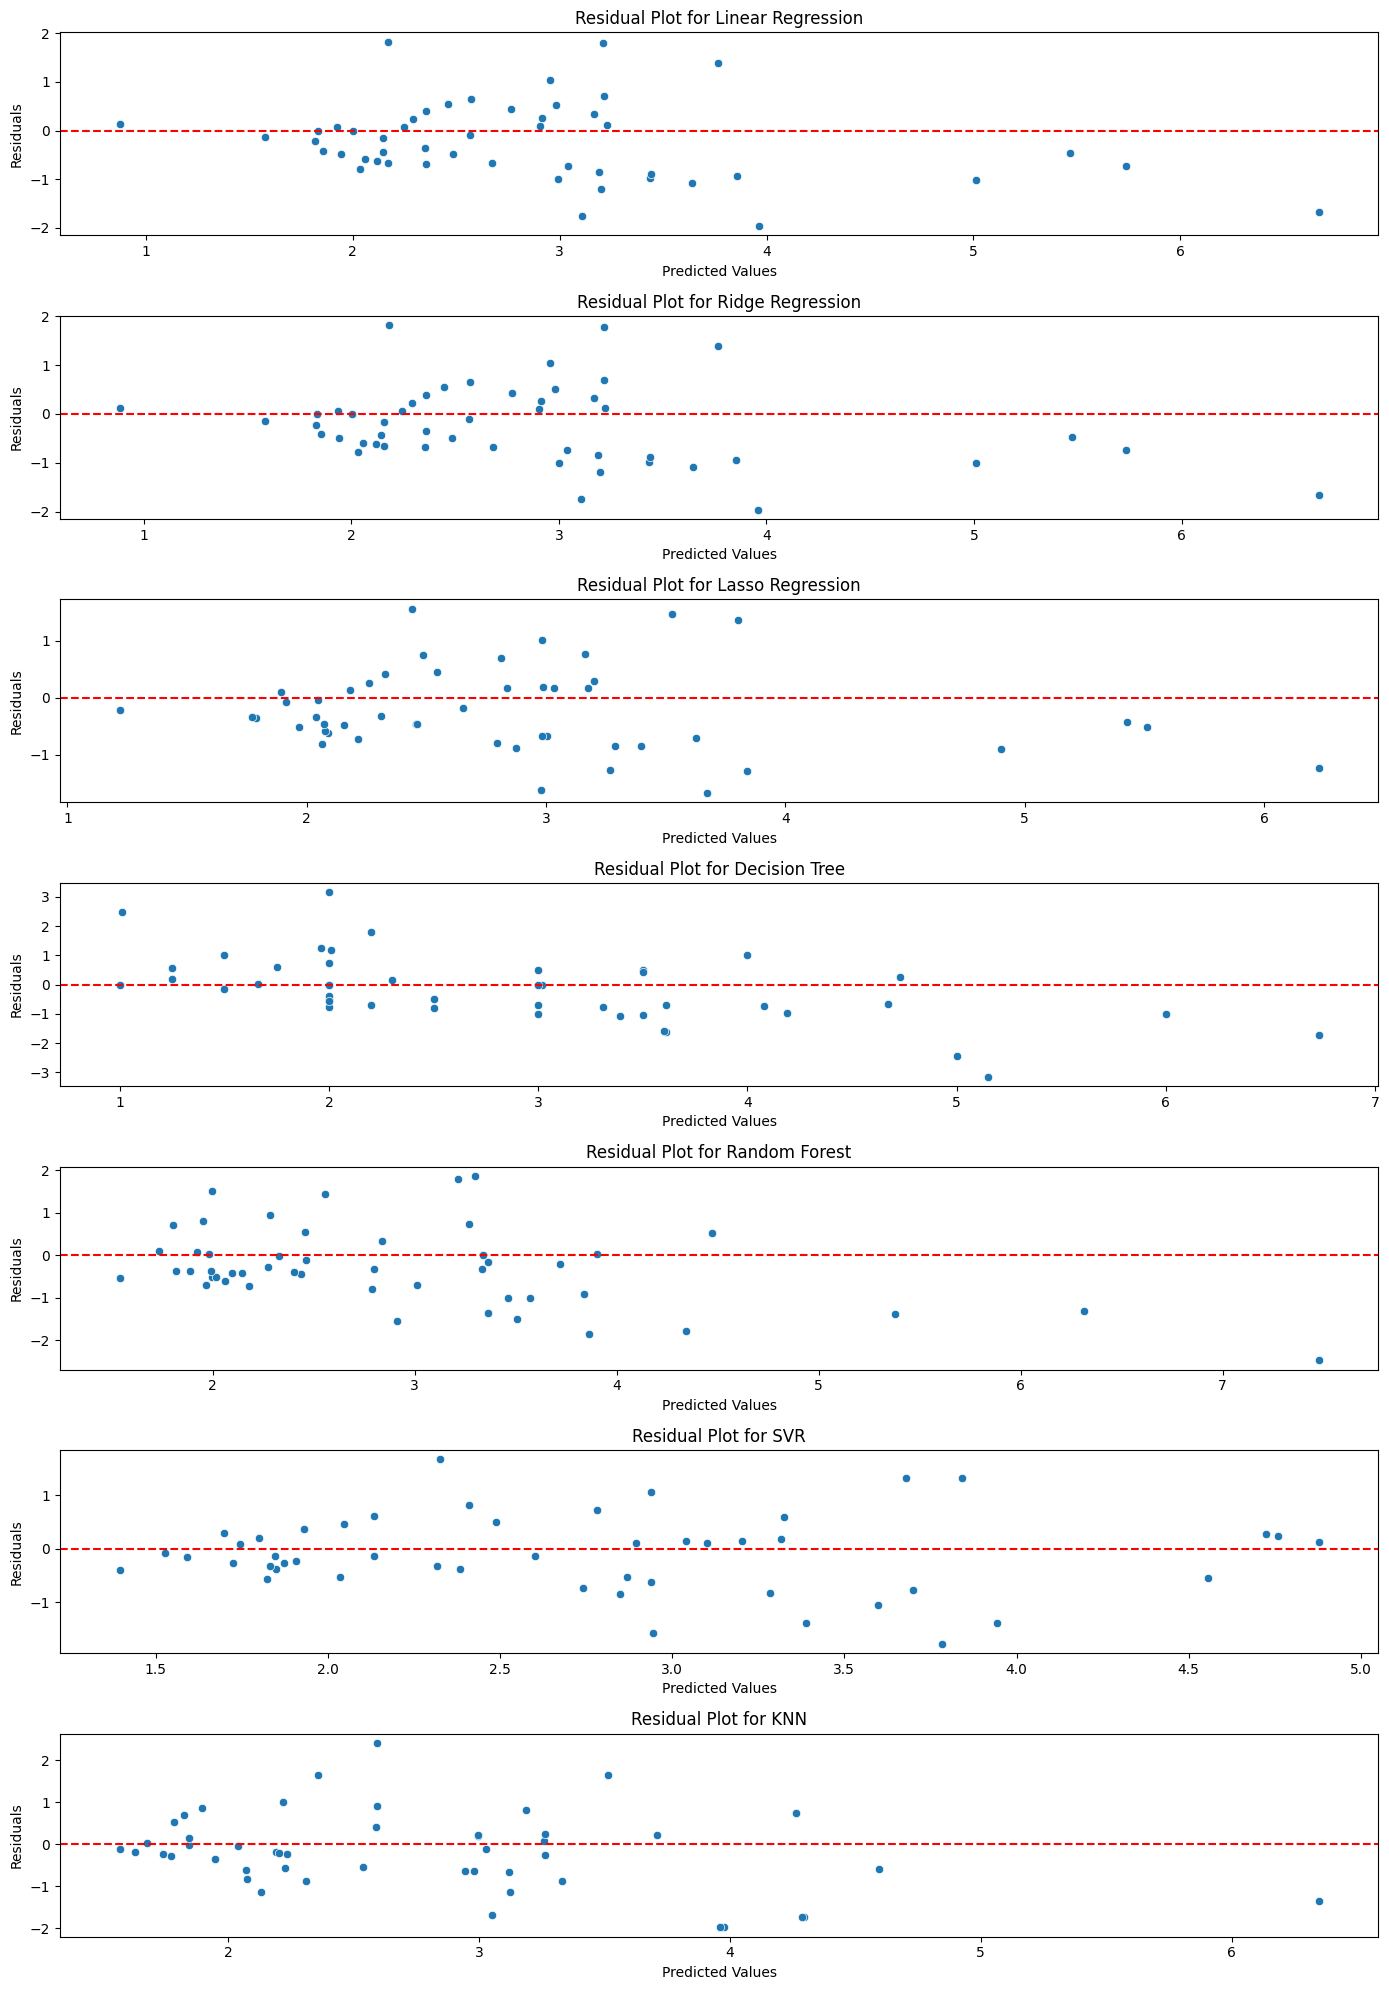

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names, predictions, and titles for residual plots
models = [
    ("Linear Regression", predictions_lr),
    ("Ridge Regression", ridge_predictions),
    ("Lasso Regression", lasso_predictions),
    ("Decision Tree", tree_predictions),
    ("Random Forest", forest_predictions),
    ("SVR", svr_predictions),
    ("KNN", knn_predictions)
]

# Generating residual plots
plt.figure(figsize=(14, 20))
for idx, (model_name, predictions) in enumerate(models, start=1):
    residuals = y_test - predictions
    plt.subplot(len(models), 1, idx)
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {model_name}")

plt.tight_layout()
plt.show()
